In [1]:
#Import modules
import pandas as pd
import matplotlib
from matplotlib import pyplot as plot
from datetime import datetime, date, timedelta
from matplotlib.pyplot import figure          

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment1/Ruter_data.csv'

In [3]:
df = pd.read_csv(url, sep=';')
df.head(5)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [4]:
####Converts str to time, replace hours over 24 with hours under 24
#### changeDate is set to True, the date change with the change of time (use it for first run only)
####Converts str to time, replace hours over 24 with hours under 24
#### changeDate is set to True, the date change with the change of time (use it for first run only)
def strToTime(rowName, changeDate=False):
    x=rowName                               #Name of the row evaluated
    for i, row in df.iterrows():            #df.iterrows() is the buildt in iter from pandas, haven't read documentation, too tierd right now
        hourStr = row[x][:2]
        try:                                #Convert string to int. If value error (ie not a number)
            hourInt = int(hourStr)
        except ValueError:
            df.drop(i, inplace=True)        #Remove the item from the list
        except:
            print("error")                  #For debugging only
            
        if hourInt>23:                                   ##Checks if %H is < 23            
            try:              
                hourInt = hourInt - 24                      #And subtracts 24h
                hourStr = str("%02d" % hourInt) + ":"       #Formats to 2-digit format
                df.at[i,x] = hourStr+row[x][3:]             #Inserts back into string
                
                if changeDate:
                    df.at[i,"Dato"]=row["Dato"] +  timedelta(days=1) #Adds one day to date where time has changed above             

            except:                                #Error msg if it fails!
                print("Error on converting:")
                print(df.iloc[i])

    
    df[x] = pd.to_datetime(df[x],format= '%H:%M:%S' ).dt.time  #Change from string to date time object
  # df[x] = pd.to_datetime(df['Date'] + " " +df[x])
    print("done with " + x)                                       #The loop take some time, so just provideing som feedback


In [5]:
df['Dato'] = pd.to_datetime(df['Dato'])                #Convert date to a datetime object
strToTime('Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', changeDate = True)  #Convert time to a datetime object, change date when time is over 24:00:00
strToTime('Tidspunkt_Faktisk_Avgang_Holdeplass_Fra')         #Change time to datetime, no need for future date change
strToTime('Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra')
strToTime('Tidspunkt_Planlagt_Avgang_Holdeplass_Fra')

done with Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra
done with Tidspunkt_Faktisk_Avgang_Holdeplass_Fra
done with Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra
done with Tidspunkt_Planlagt_Avgang_Holdeplass_Fra


In [6]:
df = df.rename(columns={"Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra":"Faktisk_Ankomst", "Tidspunkt_Faktisk_Avgang_Holdeplass_Fra":"Faktisk_Avgang", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra":"Planlagt_Ankomst", "Tidspunkt_Planlagt_Avgang_Holdeplass_Fra":"Planlagt_Avgang", "Passasjerer_Ombord":"Passasjerer_Flux"})

In [21]:
#df.iloc[245]
df.head(5)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop,Ukedag,Forsinkelse
5093,12009-2020-06-01T14:28:00+02:00,2020-01-06,Oslo,Nordøst,Stovner,Øvre Fossum (mot Stovner T),Stovner T (i Fossumveien),Lokal,Viken,120,0,14:53:21,14:53:55,14:52:00,14:52:00,72,7,00:00:34,Monday,00:01:21
5319,10012-2020-06-01T20:00:00+02:00,2020-01-06,Oslo,Nordøst,Alna,Furuset T (Plf A - bakerste stoppunkt),Folkvangveien (mot Karihaugen),Lokal,Viken,100,1,20:28:04,20:28:43,20:24:00,20:24:00,151,9,00:00:39,Monday,00:04:04
3933,40004-2020-06-01T11:55:00+02:00,2020-01-06,Viken,Nordøst,Gjerdrum,Vestby,Skei,Lokal,Viken,410,0,12:36:36,12:36:44,12:34:00,12:34:00,106,-9,00:00:08,Monday,00:02:36
2544,38001-2020-06-01T15:02:00+02:00,2020-01-06,Oslo,Nordøst,Grorud,Bånkallstubben (mot Grorud),Rommi,Lokal,Viken,380,0,15:31:10,15:31:44,15:28:00,15:28:00,115,7,00:00:34,Monday,00:03:10
4358,42003-2020-06-01T13:32:00+02:00,2020-01-06,Viken,Nordøst,Nannestad,Herstukrysset,Kopperud,Lokal,Viken,420,1,14:32:15,14:32:27,14:32:00,14:32:00,106,-14,00:00:12,Monday,00:00:15


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 5093 to 1893
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   TurId               5949 non-null   object         
 1   Dato                5949 non-null   datetime64[ns] 
 2   Fylke               5949 non-null   object         
 3   Område              5949 non-null   object         
 4   Kommune             5949 non-null   object         
 5   Holdeplass_Fra      5949 non-null   object         
 6   Holdeplass_Til      5949 non-null   object         
 7   Linjetype           5949 non-null   object         
 8   Linjefylke          5949 non-null   object         
 9   Linjenavn           5949 non-null   object         
 10  Linjeretning        5949 non-null   int64          
 11  Faktisk_Ankomst     5949 non-null   object         
 12  Faktisk_Avgang      5949 non-null   object         
 13  Planlagt_Ankomst    5949 non-n

In [23]:
print("Feature 1: time spent at the stop")
df['Time_At_Stop'] = df.apply(lambda row: datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Avgang) - datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Ankomst), axis = 1)
#Subtract Faktisk Avgang with Faktisk Ankomst to find time spent at the stop. (Datetime(1,1,1,0,0,0) is a dummy placeholder to be able to subtract.)

Feature 1: time spent at the stop


In [24]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop,Ukedag,Forsinkelse
5093,12009-2020-06-01T14:28:00+02:00,2020-01-06,Oslo,Nordøst,Stovner,Øvre Fossum (mot Stovner T),Stovner T (i Fossumveien),Lokal,Viken,120,0,14:53:21,14:53:55,14:52:00,14:52:00,72,7,00:00:34,Monday,00:01:21
5319,10012-2020-06-01T20:00:00+02:00,2020-01-06,Oslo,Nordøst,Alna,Furuset T (Plf A - bakerste stoppunkt),Folkvangveien (mot Karihaugen),Lokal,Viken,100,1,20:28:04,20:28:43,20:24:00,20:24:00,151,9,00:00:39,Monday,00:04:04
3933,40004-2020-06-01T11:55:00+02:00,2020-01-06,Viken,Nordøst,Gjerdrum,Vestby,Skei,Lokal,Viken,410,0,12:36:36,12:36:44,12:34:00,12:34:00,106,-9,00:00:08,Monday,00:02:36
2544,38001-2020-06-01T15:02:00+02:00,2020-01-06,Oslo,Nordøst,Grorud,Bånkallstubben (mot Grorud),Rommi,Lokal,Viken,380,0,15:31:10,15:31:44,15:28:00,15:28:00,115,7,00:00:34,Monday,00:03:10
4358,42003-2020-06-01T13:32:00+02:00,2020-01-06,Viken,Nordøst,Nannestad,Herstukrysset,Kopperud,Lokal,Viken,420,1,14:32:15,14:32:27,14:32:00,14:32:00,106,-14,00:00:12,Monday,00:00:15


In [25]:
df['Ukedag'] = df['Dato'].dt.day_name()

In [26]:
df['Forsinkelse'] = df.apply(lambda row: datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Ankomst) - datetime.combine(datetime(1,1,1,0,0,0), row.Planlagt_Ankomst), axis = 1)
# Subtract Faktisk Avgang with Planlagt Avgang to find the delay/anticipation in departure. (Datetime(1,1,1,0,0,0) is a dummy placeholder to be able to subtract.)

Text(0.5, 1.0, 'Stop Time Based on day of the week')

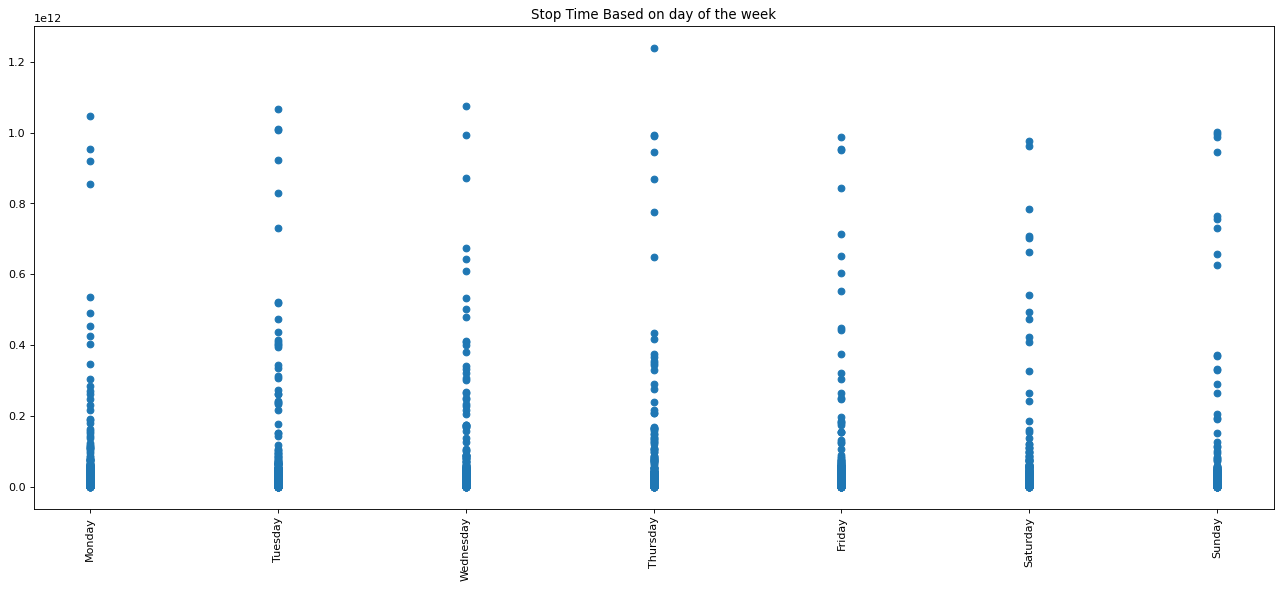

In [27]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
plot.plot(df['Ukedag'], df['Time_At_Stop'], 'o')                      #Plotting Stoptime with date, 'o' - gives scatter plot
plot.xticks(rotation='vertical')
plot.title('Stop Time Based on day of the week')

In [28]:
df["Time_At_Stop"].mean()

Timedelta('0 days 00:00:29.630526')

In [43]:

df[df['Time_At_Stop']==df['Time_At_Stop'].max()]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop,Ukedag,Forsinkelse
568,45509-2020-08-20T17:48:00+02:00,2020-08-20,Viken,Nordøst,Lillestrøm,Rånåsfoss stasjon (buss),Sandnesvegen,Lokal,Viken,455,1,17:33:01,17:53:41,17:48:00,17:48:00,80,0,00:20:40,Thursday,-1 days +23:45:01


In [32]:

df.drop([491], inplace=True) 

In [41]:
df[df['Forsinkelse']==df['Forsinkelse'].max()]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop,Ukedag,Forsinkelse
3345,55002-2020-07-01T15:45:00+02:00,2020-01-07,Viken,Sør,Nordre Follo,Fjell,Rolborg,Lokal,Viken,550,1,18:51:31,18:51:33,16:18:00,16:18:00,80,0,00:00:02,Tuesday,02:33:31


Text(0.5, 1.0, 'Forsinkelse')

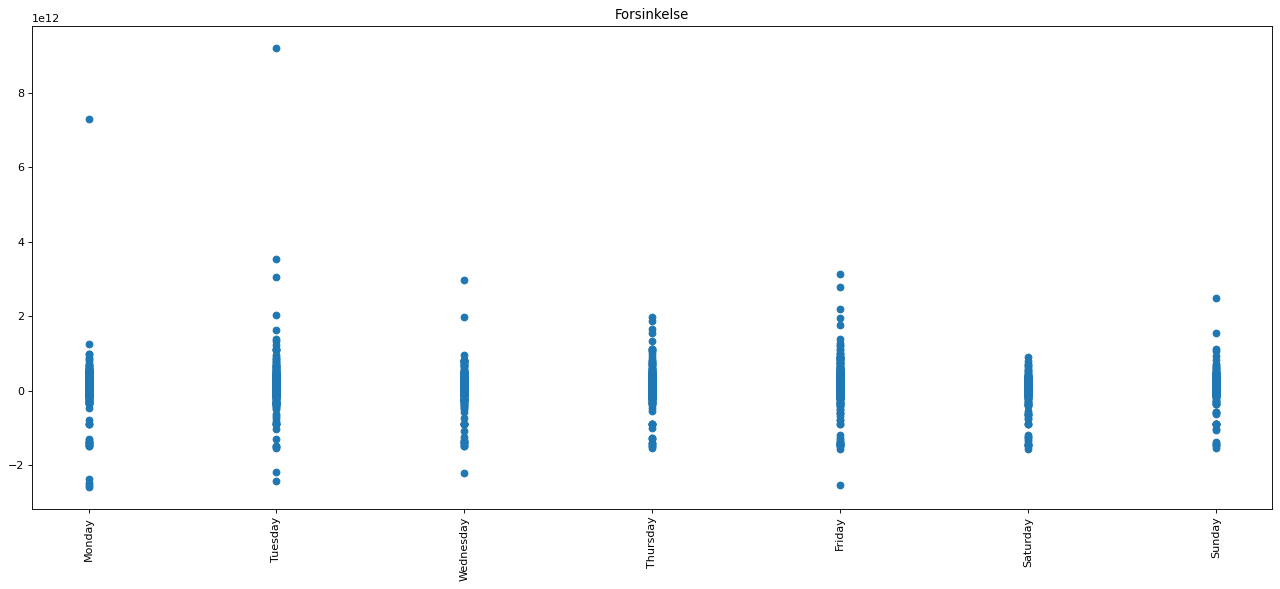

In [36]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
plot.plot(df['Ukedag'], df['Forsinkelse'], 'o')                      #Plotting Stoptime with date, 'o' - gives scatter plot
plot.xticks(rotation='vertical')
plot.title('Forsinkelse')

In [37]:
df = df.sort_values('Dato', ascending=True)

Text(0, 0.5, 'Count')

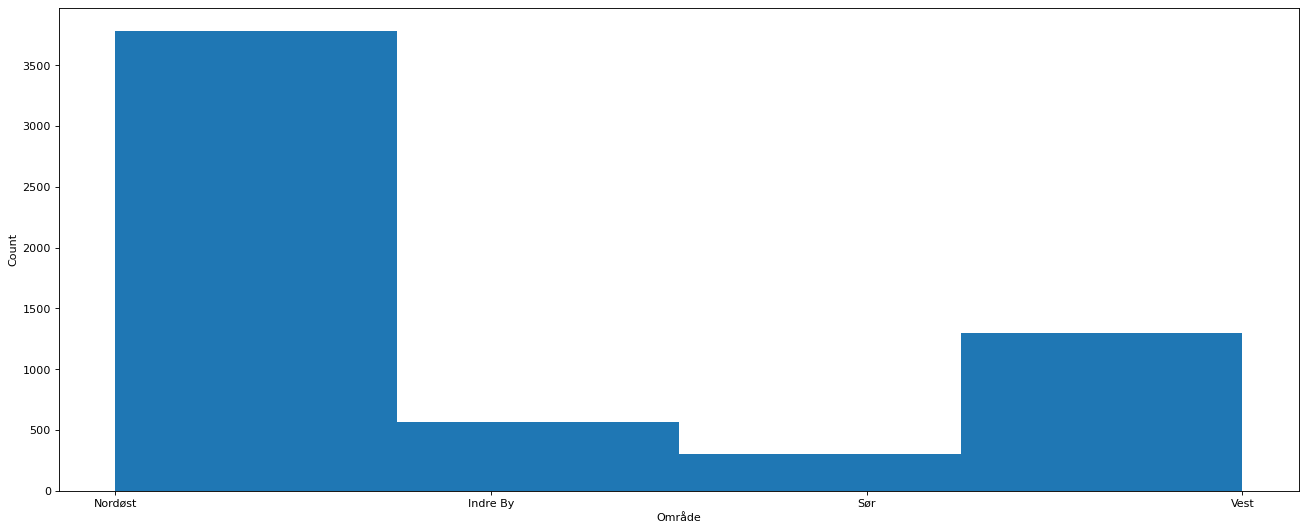

In [38]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plot
plot.hist(df.Område, bins=4, rwidth=1)
plot.xlabel('Område')
plot.ylabel('Count')